# Phase 1 Milestone 2

# Chapter I Introduction

Name    : Billy Saputra

Batch   : HCK-029

## 1.1 Topic

**Credit Card Default Prediction using Supervised Learning (Binary Classification) for Young Generation**

## 1.2 Project Background

In the modern financial world, credit risk is one of the most significant concerns for banks and digital lending institutions. One key aspect of credit risk is default, where borrowers fail to repay their credit card obligations. This issue not only affects a financial institution’s profitability but also its long-term sustainability and trustworthiness in managing lending portfolios.

In the age of digital banking, BNPL (Buy Now Pay Later), and fintech platforms, predicting which customers are likely to default on their payments has become increasingly important. Therefore, with the right predictive models, financial service providers can take proactive steps such as early warning systems, credit limit adjustments, or personalized repayment plans, all while maintaining user satisfaction and minimizing losses.

## 1.3 Dataset Description

The dataset used in this project comes from Kaggle:
- https://www.kaggle.com/datasets/mishra5001/credit-card

This dataset contains demographic, financial, and employment-related information of customers, along with the target column TARGET, which indicates whether the customer defaulted (1) or not (0). The original dataset consists of 122 columns, but in this project, we select 14 business-relevant features for simplicity, clarity, and model interpretability. In this project we only focus with customers age 25-35 y.o.

These selected features include variables such as income level, credit amount, annuity, employment history, age, education, and ownership status — all of which have strong correlation with real-world default risks based on OJK, World Bank, Mickinsey, and some related research.

| Business Relevance         | Features                                                                                                    |
| -------------------------- | ----------------------------------------------------------------------------------------------------------- |
| Customer Demographics      | `CODE_GENDER`, `NAME_EDUCATION_TYPE`, `NAME_FAMILY_STATUS`, `CNT_CHILDREN`, `DAYS_BIRTH` |
| Employment & Income Status | `NAME_INCOME_TYPE`, `DAYS_EMPLOYED`, `AMT_INCOME_TOTAL`                                                     |
| Credit & Loan Info         | `AMT_CREDIT`, `AMT_ANNUITY`                                                                                 |
| Asset Ownership            | `FLAG_OWN_CAR`, `FLAG_OWN_REALTY`                                                                           |
| Document Info              | `DAYS_ID_PUBLISH`                                                                                           |


Resource:
- https://thedocs.worldbank.org/en/doc/935891585869698451-0130022020/original/CREDITSCORINGAPPROACHESGUIDELINESFINALWEB.pdf
- https://oecd-opsi.org/wp-content/uploads/2022/01/does-the-visual-salience-of-credit-card-features-affect-choice.pdf
- https://www.mckinsey.com/~/media/McKinsey/Industries/Public%20and%20Social%20Sector/Our%20Insights/Lending%20responsibly%20New%20credit%20risk%20models%20for%20the%20unbanked/New_credit-risk_models_for_the_unbanked.pdf
- https://www.sciencedirect.com/science/article/pii/S2667345224000087

The objective of this project is to:
- Build and evaluate a binary classification model to predict whether a customer will default on their credit card based on selected features.
- Handle imbalanced data (since defaults are much rarer than non-defaults).
- Compare various machine learning algorithms.
- Perform hyperparameter tuning and cross-validation to improve model performance.
- Deploy the final model for real-world usage through a simple interface or inference script.



# Chapter II Import Libraries

In [49]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from scipy.stats import skew
from collections import Counter

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

# Cross Validation & Tuning
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTENC
from collections import Counter

# Saving Model
import pickle

# Warning Handling
import warnings
warnings.filterwarnings("ignore")


# Chapter III Data Loading

## 3.1 Loading Data

In [2]:
# Load the original dataset 
df = pd.read_csv("application_data.csv")

In [3]:
'''The original datset has been replaced with new filtered dataset:

# Select your 14 features
selected_columns = [
    'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'CNT_CHILDREN', 'DAYS_BIRTH', 'NAME_INCOME_TYPE',
    'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
    'AMT_ANNUITY', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'DAYS_ID_PUBLISH', 'TARGET'
]
df = df[selected_columns].copy()
'''

"The original datset has been replaced with new filtered dataset:\n\n# Select your 14 features\nselected_columns = [\n    'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',\n    'CNT_CHILDREN', 'DAYS_BIRTH', 'NAME_INCOME_TYPE',\n    'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',\n    'AMT_ANNUITY', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',\n    'DAYS_ID_PUBLISH', 'TARGET'\n]\ndf = df[selected_columns].copy()\n"

In [4]:
'''
The original datset has been replaced with new filtered dataset:

# Filter data by age between 25 and 35 using DAYS_BIRTH (in days)
df_filtered = df[(df['DAYS_BIRTH'] <= -25 * 365) & (df['DAYS_BIRTH'] >= -35 * 365)].copy()

# Save the filtered dataset back to the same file (overwrite)
df_filtered.to_csv("application_data.csv", index=False)
'''

'\nThe original datset has been replaced with new filtered dataset:\n\n# Filter data by age between 25 and 35 using DAYS_BIRTH (in days)\ndf_filtered = df[(df[\'DAYS_BIRTH\'] <= -25 * 365) & (df[\'DAYS_BIRTH\'] >= -35 * 365)].copy()\n\n# Save the filtered dataset back to the same file (overwrite)\ndf_filtered.to_csv("application_data.csv", index=False)\n'

In this step, we load the original dataset (application_data.csv) and filter it down to include only relevant features and applicants aged between 25 and 35 years. This helps reduce dataset size and speed up model training, especially during cross-validation.

Filtering is based on:

- 25 * 365 (≈ -9125) → 25 years old

- 35 * 365 (≈ -12775) → 35 years old



## 3.2 Check General Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72311 entries, 0 to 72310
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          72311 non-null  object 
 1   NAME_EDUCATION_TYPE  72311 non-null  object 
 2   NAME_FAMILY_STATUS   72311 non-null  object 
 3   CNT_CHILDREN         72311 non-null  int64  
 4   DAYS_BIRTH           72311 non-null  int64  
 5   NAME_INCOME_TYPE     72311 non-null  object 
 6   DAYS_EMPLOYED        72311 non-null  int64  
 7   AMT_INCOME_TOTAL     72311 non-null  float64
 8   AMT_CREDIT           72311 non-null  float64
 9   AMT_ANNUITY          72307 non-null  float64
 10  FLAG_OWN_CAR         72311 non-null  object 
 11  FLAG_OWN_REALTY      72311 non-null  object 
 12  DAYS_ID_PUBLISH      72311 non-null  int64  
 13  TARGET               72311 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 7.7+ MB


The dataset consists of 72,311 entries and 14 features, covering demographic, financial, and credit information of applicants.
1. Numerical Features
    These features are continuous or discrete numeric values:

    CNT_CHILDREN – Number of children (discrete count)

    DAYS_BIRTH – Days since birth (needs conversion to age)

    DAYS_EMPLOYED – Days employed (handle special values)

    AMT_INCOME_TOTAL – Annual income (continuous)

    AMT_CREDIT – Credit amount (continuous)

    AMT_ANNUITY – Annuity amount (continuous)

    DAYS_ID_PUBLISH – Days since ID publication

2. Categorical Features
    These features contain text-based categories that need encoding:

    CODE_GENDER – Gender (F, M, XNA)

    NAME_EDUCATION_TYPE – Education level

    NAME_FAMILY_STATUS – Marital status

    NAME_INCOME_TYPE – Employment category

3. Binary Features
    These features represent Yes/No values and can be converted to 0/1:

    FLAG_OWN_CAR – Owns a car (Y/N)

    FLAG_OWN_REALTY – Owns real estate (Y/N)


In [6]:
# Step 1: Show all columns
pd.set_option('display.max_rows', None)

# Step 2: Create the column summary table
column_summary = pd.DataFrame({
    'Column Name': df.columns,
    'Non-Null Count': df.notnull().sum().values,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,
    'Missing (%)': (df.isnull().mean().values * 100).round(2)
})

# Step 3: Sort by highest missing percentage (optional)
column_summary = column_summary.sort_values(by='Missing (%)', ascending=False).reset_index(drop=True)

# Step 4: Show the result
column_summary

,Column Name,Non-Null Count,Data Type,Missing Values,Missing (%)
0,AMT_ANNUITY,72307,float64,4,0.01
1,CODE_GENDER,72311,object,0,0.00
2,NAME_EDUCATION_TYPE,72311,object,0,0.00
3,NAME_FAMILY_STATUS,72311,object,0,0.00
4,CNT_CHILDREN,72311,int64,0,0.00
5,DAYS_BIRTH,72311,int64,0,0.00
6,NAME_INCOME_TYPE,72311,object,0,0.00
7,DAYS_EMPLOYED,72311,int64,0,0.00
8,AMT_INCOME_TOTAL,72311,float64,0,0.00
9,AMT_CREDIT,72311,float64,0,0.00


There are 4 missing value in column AMT_ANNUITY which need to be handled.

After reviewing the full dataset containing 122 columns, we selected 14 business-relevant features along with the TARGET variable for further analysis. These features were chosen based on their strong relevance to credit risk assessment, supported by findings from OJK, World Bank, OECD, and McKinsey research, which consistently highlight factors such as income level, employment history, family structure, and credit exposure as key drivers of default risk. We also filter only young generation with age between 25-35.

In addition to their practical significance, these features were prioritized for their low proportion of missing values, clean structure, and high interpretability, making them suitable for use in both machine learning models and real world financial decision making systems.

## 3.3 Checking Duplicates

In [7]:
num_duplicates = df.duplicated().sum()
num_duplicates

1

There is one duplicate data in this dataset. So, we can remove the duplicate.

In [8]:
# Remove duplicate rows (keep the first occurrence)
df = df.drop_duplicates()

In [9]:
print("Remaining duplicates:", df.duplicated().sum())

Remaining duplicates: 0


# Chapter IV Exploratory Data Analysis (EDA)

## 4.1 Checking Data Description

In [10]:
# Check the basic statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,72310.0,0.684636,0.819121,0.0,0.0,0.0,1.0,19.0
DAYS_BIRTH,72310.0,-11082.126442,987.330558,-12775.0,-11917.0,-11108.0,-10261.0,-9125.0
DAYS_EMPLOYED,72310.0,-237.272673,22028.359246,-6116.0,-2259.0,-1273.0,-623.0,365243.0
AMT_INCOME_TOTAL,72310.0,172034.586223,445103.918018,27000.0,112500.0,157500.0,202500.0,117000000.0
AMT_CREDIT,72310.0,542274.438342,374645.795634,45000.0,269550.0,450000.0,720000.0,4050000.0
AMT_ANNUITY,72306.0,26694.638536,14122.683344,2317.5,16371.0,24759.0,33750.0,225000.0
DAYS_ID_PUBLISH,72310.0,-2671.649578,1211.369019,-5447.0,-3600.0,-2737.0,-1873.0,0.0
TARGET,72310.0,0.106721,0.308760,0.0,0.0,0.0,0.0,1.0


In [11]:
# Create summary of unique values per column in the current df
unique_summary = pd.DataFrame({
    'Feature': df.columns,
    'Total Unique': [df[col].nunique() for col in df.columns],
    'List of Unique': [df[col].unique().tolist() for col in df.columns]
})

# Optional: Display all values in 'List of Unique' column
pd.set_option('display.max_colwidth', None)

# Show the summary
unique_summary

,Feature,Total Unique,List of Unique
0,CODE_GENDER,3,"[M, F, XNA]"
1,NAME_EDUCATION_TYPE,5,"[Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]"
2,NAME_FAMILY_STATUS,6,"[Single / not married, Married, Civil marriage, Separated, Widow, Unknown]"
3,CNT_CHILDREN,11,"[0, 1, 2, 3, 4, 5, 9, 7, 10, 8, 19]"
4,DAYS_BIRTH,3651,"[-9461, -10197, -9776, -11348, -11146, -11286, -9994, -10341, -11144, -11694, -12158, -9827, -12406, -12282, -10473, -12240, -12049, -11956, -10848, -12009, -11187, -9666, -10744, -10485, -10199, -10734, -11142, -9650, -10954, -9415, -10526, -9207, -10085, -9223, -9203, -12157, -11944, -12348, -11633, -11375, -10887, -11568, -12019, -12147, -12027, -12648, -10127, -11177, -10010, -11978, -9720, -11259, -10038, -10571, -11180, -9135, -12246, -9157, -12585, -10755, -9907, -11881, -11356, -10427, -12209, -10788, -10203, -9627, -11631, -11996, -10471, -10442, -9324, -10935, -11287, -10390, -9259, -9178, -9166, -11788, -11285, -11223, -11799, -12325, -10615, -11582, -10547, -11039, -12360, -10347, -11693, -12191, -11523, -9842, -9825, -11935, -9496, -10046, -11353, -9684, ...]"
5,NAME_INCOME_TYPE,8,"[Working, State servant, Commercial associate, Pensioner, Businessman, Unemployed, Student, Maternity leave]"
6,DAYS_EMPLOYED,5339,"[-637, -679, -191, -2038, -4306, -746, -1796, -1010, -1104, -2060, -1275, -758, -1176, -778, -1392, -3720, -579, -3154, -121, -2844, -2224, -2811, -741, -1249, -2015, -693, -2419, -2953, -2469, -225, -267, -1043, -465, -802, -481, -2995, -2899, -1821, -2596, -2311, -341, -2331, -1148, -2178, -1720, -2802, -111, -1514, -240, -3947, -573, -164, -1746, -1028, -1313, -460, -1787, -146, -870, -1185, -648, -716, -602, -1274, -1572, -2573, -59, -189, -782, -2907, -1753, -864, -872, -422, -3894, -370, -2382, -633, -1450, -3144, -3473, -107, -1228, -638, -1496, -3632, -1897, -1865, -4048, -1276, -3158, -3298, -3443, -914, -157, -819, -663, -5348, -1444, -651, ...]"
7,AMT_INCOME_TOTAL,1018,"[202500.0, 112500.0, 81000.0, 90000.0, 450000.0, 135000.0, 270000.0, 360000.0, 54000.0, 76500.0, 225000.0, 180000.0, 157500.0, 315000.0, 85500.0, 67500.0, 171000.0, 144000.0, 117000.0, 164250.0, 292500.0, 72000.0, 73341.0, 153000.0, 63000.0, 121500.0, 382500.0, 765000.0, 166500.0, 247500.0, 211500.0, 193500.0, 337500.0, 126000.0, 103500.0, 229500.0, 99000.0, 108000.0, 184500.0, 243000.0, 216000.0, 540000.0, 45000.0, 214650.0, 189000.0, 94500.0, 252000.0, 168930.0, 169137.0, 247891.5, 236799.0, 96453.0, 405000.0, 148500.0, 76995.0, 234823.5, 207000.0, 630000.0, 234135.0, 220500.0, 234000.0, 168750.0, 62100.0, 288000.0, 49500.0, 297000.0, 128250.0, 130500.0, 351000.0, 468823.5, 78930.0, 693000.0, 175500.0, 162000.0, 418500.0, 173250.0, 262503.0, 80383.5, 58500.0, 468000.0, 810000.0, 36000.0, 139500.0, 1350000.0, 225450.0, 333000.0, 114300.0, 414000.0, 81751.5, 426019.5, 60750.0, 108859.5, 261000.0, 432000.0, 339750.0, 675000.0, 283500.0, 517500.0, 967500.0, 40500.0, ...]"
8,AMT_CREDIT,3552,"[406597.5, 652500.0, 270000.0, 544491.0, 497520.0, 247500.0, 790830.0, 180000.0, 512064.0, 733315.5, 450000.0, 661702.5, 135000.0, 454500.0, 314055.0, 95940.0, 1256400.0, 755190.0, 337761.0, 373140.0, 862560.0, 953460.0, 284400.0, 781920.0, 808650.0, 723996.0, 384048.0, 675000.0, 539590.5, 590337.0, 336150.0, 318528.0, 888840.0, 436032.0, 2250000.0, 1024740.0, 161730.0, 90000.0, 225000.0, 427450.5, 747000.0, 292500.0, 1019205.0, 334152.0, 426645.0, 239850.0, 288873.0, 381528.0, 481855.5, 152820.0, 545040.0, 1223010.0, 946503.0, 1350000.0, 302544.0, 555273.0, 521280.0, 533304.0, 495000.0, 598486.5, 830214.0, 540000.0, 345510.0, 393543.0, 473760.0, 810000.0, 314100.0, 716161.5, 343683.0, 904500.0, 1044724.5, 338832.0, 900000.0, 1125000.0, 337500.0, 1320975.0, 983299.5, 358443.0, 679500.0, 302076.0, 1006920.0, 294322.5, 364896.0, 926136.0, 157500.0, 238500.0, 373311.0, 254700.0, 119925.0, 755856.0, 427500.0, 422451.0, 1078200.0, 631332.0, 244998.0, 439740.0, 761067.0, 746280.0, 107820.

1. CODE_GENDER
- Gender of the customer.
- Unique values: 'M', 'F', 'XNA'
- Note: 'XNA' is an invalid or unknown entry and should be treated as missing or removed.

2. NAME_EDUCATION_TYPE
- Highest education level.
- Unique values: 'Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree'

3. NAME_FAMILY_STATUS
- Marital status.
- Unique values: 'Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated', 'Unknown'
- Consider handling 'Unknown' as missing.

4. CNT_CHILDREN
- Number of children (integer).
- Unique values range from 0 to 19
- Unusual values like 5 to 19 may indicate outliers.

5. DAYS_BIRTH
- Customer age in negative days (e.g., -9461).
- Will be converted to positive age in years for better interpretability.

6. NAME_INCOME_TYPE
- Income type (job category).
- Unique values: 'Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave'

7. DAYS_EMPLOYED
- Number of days employed (negative).
- Special value: 365243 → means not working → should be replaced with NaN

8. AMT_INCOME_TOTAL
- Total annual income.
- Numeric float values.

9. AMT_CREDIT
- Total loan/credit amount.
- Numeric float values.

10. AMT_ANNUITY
- Monthly repayment amount.
- Missing values (4 entries) → to be imputed.

11. FLAG_OWN_CAR
- Indicates whether customer owns a car.
- Unique values: 'Y', 'N'

12. FLAG_OWN_REALTY
- Indicates whether customer owns property/real estate.
- Unique values: 'Y', 'N'

13. DAYS_ID_PUBLISH
- Days since ID document was issued or updated.
- Negative days (e.g., -2120).

14. TARGET
- Binary classification label:
- 0: No default
- 1: Customer defaulted on credit card

## 4.2 Unique Value & Distribution Check

Next, we need to analyze the number of unique values and their percentage distribution in key categorical and discrete features, helping identify rare, dominant, or invalid categories before encoding.

In [12]:
# List of selected columns
columns_to_check = [
    'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'CNT_CHILDREN', 'NAME_INCOME_TYPE',
    'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'TARGET'
]

# Loop through each column to display total unique values, counts, and percentage
for col in columns_to_check:
    print(f"\n📌 Column: {col}")
    print(f"Total Unique Values: {df[col].nunique()}\n")
    print("Unique Value Counts and Percentages:")
    
    value_counts = df[col].value_counts(dropna=False)
    value_percents = df[col].value_counts(normalize=True, dropna=False) * 100
    summary = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_percents.round(2).astype(str) + '%'
    })
    print(summary)



📌 Column: CODE_GENDER
Total Unique Values: 3

Unique Value Counts and Percentages:
             Count Percentage
CODE_GENDER                  
F            42281     58.47%
M            30027     41.53%
XNA              2       0.0%

📌 Column: NAME_EDUCATION_TYPE
Total Unique Values: 5

Unique Value Counts and Percentages:
                               Count Percentage
NAME_EDUCATION_TYPE                            
Secondary / secondary special  43097      59.6%
Higher education               24119     33.35%
Incomplete higher               4398      6.08%
Lower secondary                  657      0.91%
Academic degree                   39      0.05%

📌 Column: NAME_FAMILY_STATUS
Total Unique Values: 6

Unique Value Counts and Percentages:
                      Count Percentage
NAME_FAMILY_STATUS                    
Married               46536     64.36%
Single / not married  14819     20.49%
Civil marriage         7738      10.7%
Separated              2988      4.13%
Widow        

| Feature                   | Notable Insights                                                                                           |
| ------------------------- | ---------------------------------------------------------------------------------------------------------- |
| **CODE\_GENDER**          | Mostly female (58.47%). Minor anomaly: `'XNA'` (2 rows, 0.00%) — should be cleaned.                        |
| **NAME\_EDUCATION\_TYPE** | Dominated by “Secondary / secondary special” (59.6%), followed by “Higher education”.                      |
| **NAME\_FAMILY\_STATUS**  | Majority are married (64.36%). One unknown value needs imputation or removal.                              |
| **CNT\_CHILDREN**         | Over 97% have ≤2 children. Rare long-tail values like 7, 8, 9, 10, 19 — consider grouping.                 |
| **NAME\_INCOME\_TYPE**    | Over 99% are Working, Commercial associate, or State servant. Rare categories can be grouped as `'Other'`. |
| **FLAG\_OWN\_CAR**        | 60.29% do **not** own a car.                                                                               |
| **FLAG\_OWN\_REALTY**     | 61.73% **own real estate**.                                                                                |
| **TARGET**                | Default rate: **10.67%** (mild imbalance, might benefit from resampling).                                  |


## 4.3 Visualizations

### 1. Class Imbalance – Target Distribution

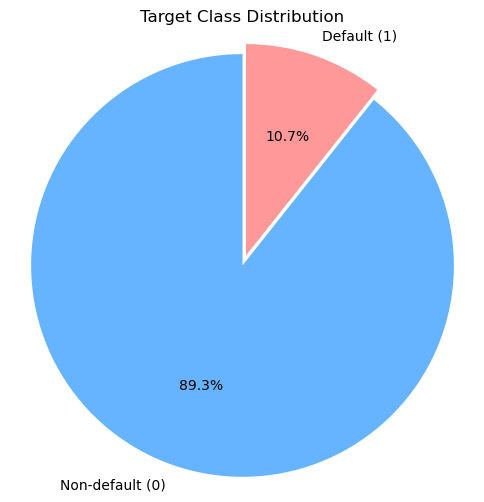

In [13]:
# Count values
target_counts = df['TARGET'].value_counts()
labels = ['Non-default (0)', 'Default (1)']
colors = ['#66b3ff', '#ff9999']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.05))
plt.title('Target Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

The target is imbalance. So, we will use SMOTENC (SMOTE for categorical + numeric) to balance the classes during training.

### 2. Gender VS Target

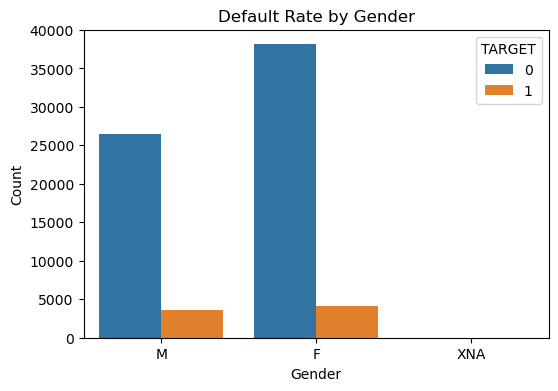

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='CODE_GENDER', hue='TARGET', data=df)
plt.title('Default Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Although the total number of female applicants is higher than males, the default rate among females is lower. In contrast, males have a smaller population, but their proportion of defaults is relatively higher.

This suggests that gender may have a relationship with credit default behavior, which could be relevant in model performance and feature importance.

### 3. Boxplot

Since DAYS_BIRTH, DAYS_EMPLOYED, and DAYS_ID_PUBLISH are recorded as negative values (representing days before the application date), we converted them to positive using .abs() for easier understanding. Additionally, DAYS_EMPLOYED contains a special placeholder value of 365243, which indicates a customer is not currently employed. This anomalous value was replaced with NaN to avoid misleading analysis. These transformations help ensure the features are clean, meaningful, and ready for visualization or use in machine learning models.

In [15]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].abs()
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs()
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].abs()

We selected the features `DAYS_BIRTH`, `DAYS_EMPLOYED`, `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, and `DAYS_ID_PUBLISH` for boxplot visualization because they are continuous numerical variables that are critical to credit risk analysis and are prone to containing outliers. Using boxplots allows us to visually detect the presence of extreme values, assess the distribution and spread of each feature, and support decisions on whether outlier handling or transformation is needed before modeling. These features are directly related to an applicant’s age, employment history, financial capacity, and credit behavior, making them highly relevant for understanding patterns in loan default risk.

In [16]:
features_to_plot = [
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'DAYS_ID_PUBLISH'
]

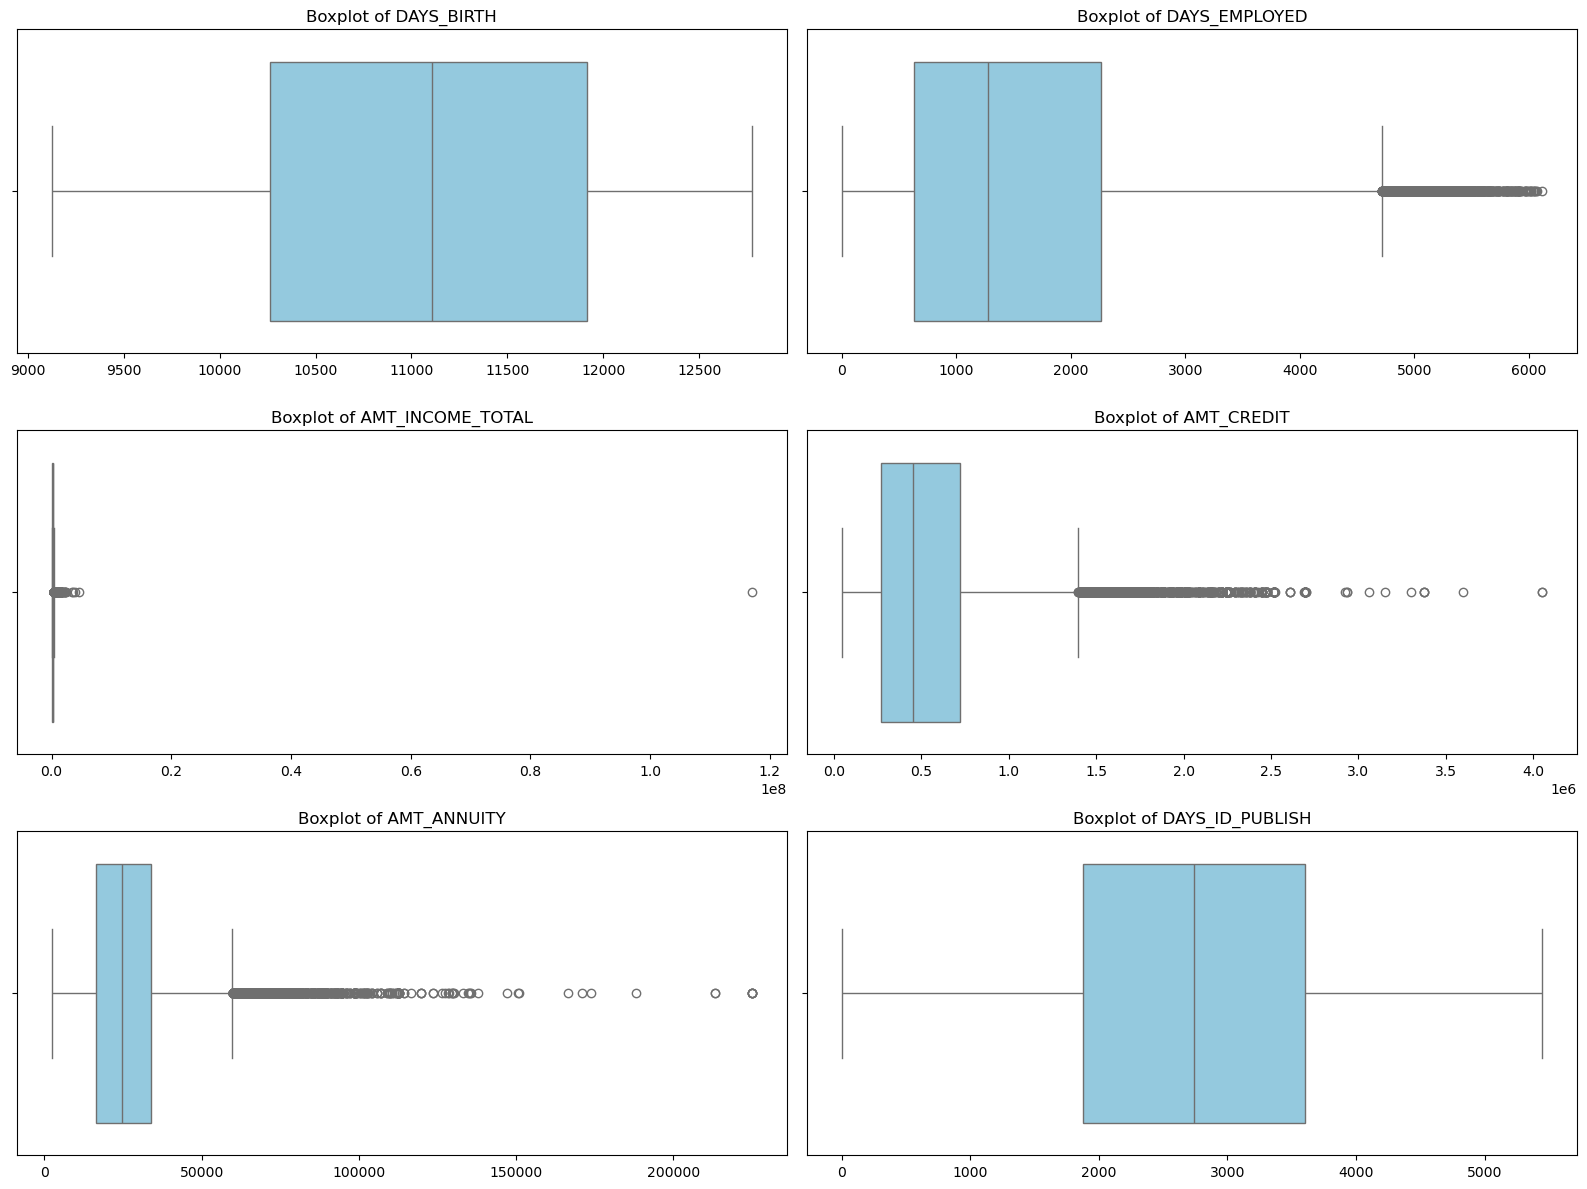

In [17]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

1. Boxplot of DAYS_BIRTH
- Range: ~9500 to ~12500 days
- Interquartile Range (IQR): Concentrated around 10500 to 11500 days
- Outliers: Minimal, near 9500 days

2. Boxplot of DAYS_EMPLOYED
- Range: ~0 to ~6000 days
- IQR: Concentrated around 1000 to 3000 days
- Outliers: Significant, extending beyond 5000 days

3. Boxplot of AMT_INCOME_TOTAL
- Range: Very narrow, close to 0
- IQR: Not well-defined, data highly skewed
- Outliers: Present, scattered beyond the main range

4. Boxplot of AMT_CREDIT
- Range: ~0 to ~4e6 (4 million)
- IQR: Concentrated around 1e6 to 2e6
- Outliers: Numerous, extending beyond 3e6

5. Boxplot of AMT_ANNUITY
- Range: ~0 to ~200000
- IQR: Concentrated around 50000 to 100000
- Outliers: Present, scattered beyond 150000

6. Boxplot of DAYS_ID_PUBLISH
- Range: ~0 to ~5000 days
- IQR: Concentrated around 1000 to 3000 days
- Outliers: Minimal, near 0 and 5000 days

### 4. Converting Days to Year

Handling missing value and replace data before converting to be year.

In [18]:
# DAYS_EMPLOYED: replace 365243 with NaN, then impute with median
if 'DAYS_EMPLOYED' in df.columns:
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)
    df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].median(), inplace=True)

`DAYS_EMPLOYED`: The placeholder value `365243` indicates "not employed" and was replaced with `NaN`, then imputed using the median to preserve distribution.

In [19]:
df['AGE_YEARS'] = (df['DAYS_BIRTH'] / 365).round(1)
df['YEARS_EMPLOYED'] = (df['DAYS_EMPLOYED'] / 365).round(1)
df['YEARS_ID_PUBLISHED'] = (df['DAYS_ID_PUBLISH'] / 365).round(1)

In [20]:
df.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH'], axis=1, inplace=True)

In most credit scoring and machine learning contexts, it’s a best practice to convert DAYS_BIRTH, DAYS_EMPLOYED, and DAYS_ID_PUBLISH into years, because:

- They become more interpretable (humans and business stakeholders understand "years" better).

- It helps with feature scaling (e.g., 45 vs. 16425 days).

- Many credit models use age or employment duration in years as a standard feature.



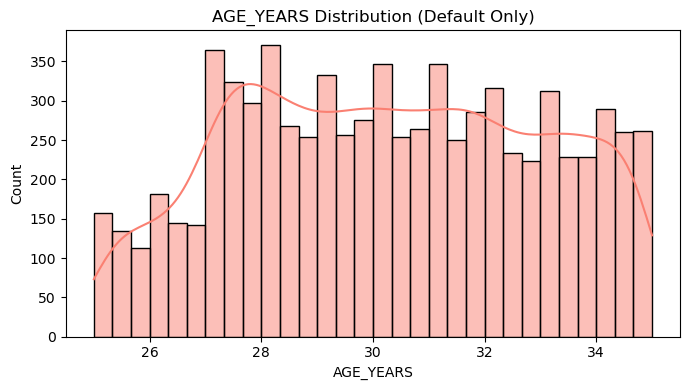

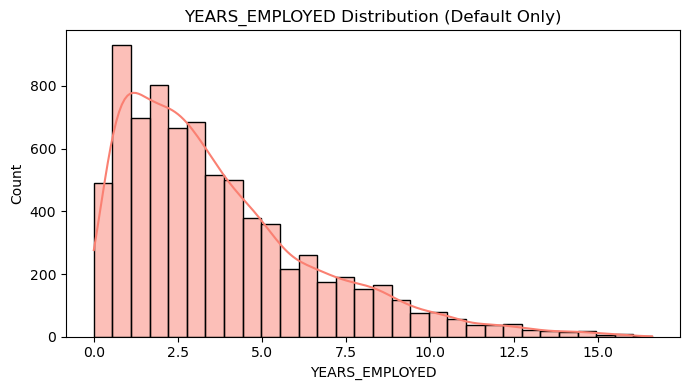

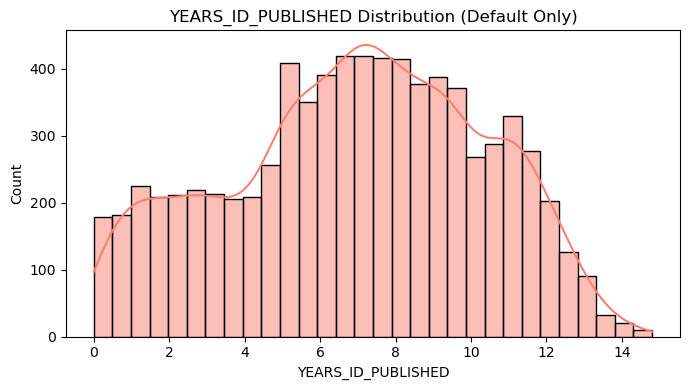

In [21]:
df_default = df[df['TARGET'] == 1]

features = ['AGE_YEARS', 'YEARS_EMPLOYED', 'YEARS_ID_PUBLISHED']

for col in features:
    plt.figure(figsize=(7, 4))
    sns.histplot(df_default[col], bins=30, kde=True, color='salmon')
    plt.title(f'{col} Distribution (Default Only)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

1. AGE_YEARS Distribution
- **Range**: 25 to 35 years
- **Peak**: Around 30-32 years with a count of ~350
- **Trend**: Sharp increase from 26 to 30, followed by a gradual decline to 34
- **Analysis**: The majority of defaults occur between 30-32 years, suggesting a higher default risk in this age group.

2. YEARS_EMPLOYED Distribution
- **Range**: 0 to 15 years
- **Peak**: Around 0-2.5 years with a count of ~800
- **Trend**: Rapid decline after 2.5 years, with a long tail up to 15 years
- **Analysis**: Defaults are most common among individuals with 0-2.5 years of employment, indicating potential instability or inexperience in this group.

3. YEARS_ID_PUBLISHED Distribution
- **Range**: 0 to 14 years
- **Peak**: Around 4-6 years with a count of ~400
- **Trend**: Symmetrical distribution with a slight skew towards lower years
- **Analysis**: Defaults peak around 4-6 years of ID publication, suggesting a moderate correlation with the duration since ID issuance.

### 5. Correlation Heatmap for Numeric

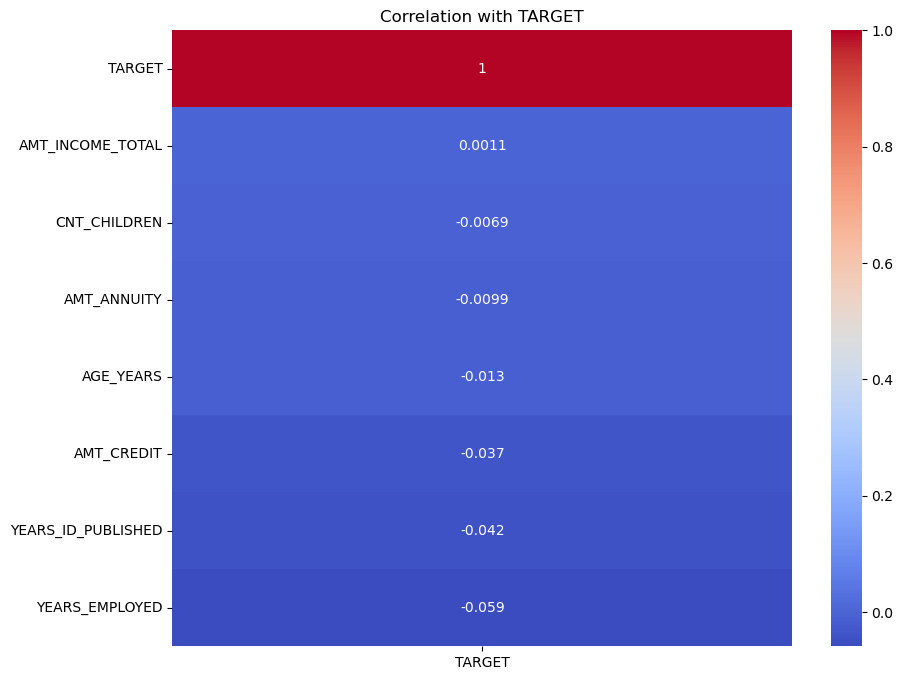

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True)[['TARGET']].sort_values('TARGET', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title('Correlation with TARGET')
plt.show()

1. TARGET
- **Correlation**: 1 (Self-correlation)
- **Analysis**: Perfect correlation with itself, as expected.

2. AMT_INCOME_TOTAL
- **Correlation**: 0.0011
- **Analysis**: Very weak positive correlation, indicating negligible impact on TARGET.

3. CNT_CHILDREN
- **Correlation**: -0.0069
- **Analysis**: Very weak negative correlation, suggesting minimal influence of number of children on TARGET.

4. AMT_ANNUITY
- **Correlation**: -0.0099
- **Analysis**: Very weak negative correlation, indicating little effect of annuity amount on TARGET.

5. AGE_YEARS
- **Correlation**: -0.013
- **Analysis**: Very weak negative correlation, showing almost no relationship with TARGET.

6. AMT_CREDIT
- **Correlation**: -0.037
- **Analysis**: Weak negative correlation, suggesting a slight inverse relationship with TARGET.

7. YEARS_ID_PUBLISHED
- **Correlation**: -0.042
- **Analysis**: Weak negative correlation, indicating a minor inverse effect on TARGET.

8. YEARS_EMPLOYED
- **Correlation**: -0.059
- **Analysis**: Moderate negative correlation, suggesting a noticeable inverse relationship with TARGET.

# Chapter V Feature Engineering

## 5.1 Handling Missing Value

In [23]:
# 1. CODE_GENDER: replace 'XNA' with NaN, then impute with mode
df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA', np.nan)
gender_mode = df['CODE_GENDER'].mode()[0]
df['CODE_GENDER'].fillna(gender_mode, inplace=True)

# 2. NAME_FAMILY_STATUS: replace 'Unknown' with NaN, then impute with mode
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace('Unknown', np.nan)
family_mode = df['NAME_FAMILY_STATUS'].mode()[0]
df['NAME_FAMILY_STATUS'].fillna(family_mode, inplace=True)

# 3. AMT_ANNUITY: fill missing values with median
annuity_median = df['AMT_ANNUITY'].median()
df['AMT_ANNUITY'].fillna(annuity_median, inplace=True)

We performed data cleaning on several columns to address invalid categories and missing values:

- `CODE_GENDER`: The value `'XNA'` was considered invalid and replaced with `NaN`. We then imputed missing values using the mode (most common gender).
- `NAME_FAMILY_STATUS`: The value `'Unknown'` was treated as missing and replaced with the mode.
- `AMT_ANNUITY`: Contains true missing values, which we imputed with the median.

These strategies ensure that invalid values do not bias the model and preserve data integrity while minimizing information loss.

In [24]:
selected_columns_new = [
    'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'CNT_CHILDREN', 'AGE_YEARS',
    'NAME_INCOME_TYPE', 'YEARS_EMPLOYED', 'AMT_INCOME_TOTAL',
    'AMT_CREDIT', 'AMT_ANNUITY', 'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY', 'YEARS_ID_PUBLISHED', 'TARGET'
]

column_summary = pd.DataFrame({
    'Column Name': selected_columns_new,
    'Non-Null Count': df.notnull().sum().values,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,
    'Missing (%)': (df.isnull().mean().values * 100).round(2)
})

# Step 3: Display the result
column_summary

,Column Name,Non-Null Count,Data Type,Missing Values,Missing (%)
0,CODE_GENDER,72310,object,0,0.0
1,NAME_EDUCATION_TYPE,72310,object,0,0.0
2,NAME_FAMILY_STATUS,72310,object,0,0.0
3,CNT_CHILDREN,72310,int64,0,0.0
4,AGE_YEARS,72310,object,0,0.0
5,NAME_INCOME_TYPE,72310,float64,0,0.0
6,YEARS_EMPLOYED,72310,float64,0,0.0
7,AMT_INCOME_TOTAL,72310,float64,0,0.0
8,AMT_CREDIT,72310,object,0,0.0
9,AMT_ANNUITY,72310,object,0,0.0


There is no missing value in the dataset.

## 5.2 Handling Cardinality

### 1. Handling CNT_CHILDREN – Group Long-Tail Values


In [25]:
df['CNT_CHILDREN_GROUPED'] = df['CNT_CHILDREN'].apply(lambda x: str(x) if x < 3 else '3+')

In [26]:
df.drop('CNT_CHILDREN', axis=1, inplace=True)

Combining 3+ children into a single category improves model robustness, simplifies interpretation, and handles sparse data effectively.

- Rare Values: Categories with 3+ children are uncommon (≤ 2% total).

- Better Analysis: Grouping them simplifies models and avoids noise from tiny groups.

- Clearer Insights: "3+" is easier to interpret than tracking very small counts (like 7, 10, or 19 kids).



### 2. Handling NAME_INCOME_TYPE – Group Rare Categories

In [27]:
# Calculate value counts and their percentages
income_type_pct = df['NAME_INCOME_TYPE'].value_counts(normalize=True)

# Get labels with less than 1% occurrence
rare_income_labels = income_type_pct[income_type_pct < 0.01].index

# Replace them with 'Other'
df['NAME_INCOME_TYPE_GROUPED'] = df['NAME_INCOME_TYPE'].replace(rare_income_labels, 'Other')

In [28]:
df.drop(['NAME_INCOME_TYPE'], axis=1, inplace=True)

In [29]:
df.head()

,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,FLAG_OWN_CAR,FLAG_OWN_REALTY,TARGET,AGE_YEARS,YEARS_EMPLOYED,YEARS_ID_PUBLISHED,CNT_CHILDREN_GROUPED,NAME_INCOME_TYPE_GROUPED
0,M,Secondary / secondary special,Single / not married,202500.0,406597.5,24700.5,N,Y,1,25.9,1.7,5.8,0,Working
1,F,Higher education,Married,112500.0,652500.0,21177.0,N,Y,0,27.9,1.9,2.0,1,Working
2,F,Secondary / secondary special,Married,81000.0,270000.0,13500.0,N,Y,0,26.8,0.5,6.6,1,Working
3,F,Higher education,Single / not married,90000.0,544491.0,17563.5,N,Y,0,31.1,5.6,10.9,1,State servant
4,F,Secondary / secondary special,Married,450000.0,497520.0,32521.5,N,N,0,30.5,11.8,6.9,1,Working


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72310 entries, 0 to 72310
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CODE_GENDER               72310 non-null  object 
 1   NAME_EDUCATION_TYPE       72310 non-null  object 
 2   NAME_FAMILY_STATUS        72310 non-null  object 
 3   AMT_INCOME_TOTAL          72310 non-null  float64
 4   AMT_CREDIT                72310 non-null  float64
 5   AMT_ANNUITY               72310 non-null  float64
 6   FLAG_OWN_CAR              72310 non-null  object 
 7   FLAG_OWN_REALTY           72310 non-null  object 
 8   TARGET                    72310 non-null  int64  
 9   AGE_YEARS                 72310 non-null  float64
 10  YEARS_EMPLOYED            72310 non-null  float64
 11  YEARS_ID_PUBLISHED        72310 non-null  float64
 12  CNT_CHILDREN_GROUPED      72310 non-null  object 
 13  NAME_INCOME_TYPE_GROUPED  72310 non-null  object 
dtypes: float64(

### 3. Handling Outlier

In [31]:
numeric_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                'AGE_YEARS', 'YEARS_EMPLOYED', 'YEARS_ID_PUBLISHED']

# Create a summary table
skew_summary = []

for col in numeric_cols:
    skew_val = skew(df[col].dropna())
    distribution = 'normal' if -0.5 <= skew_val <= 0.5 else 'skewed'
    skew_summary.append({
        'Feature': col,
        'Skewness': round(skew_val, 2),
        'Distribution': distribution
    })

# Convert to DataFrame
skew_df = pd.DataFrame(skew_summary)
print(skew_df)


              Feature  Skewness Distribution
0    AMT_INCOME_TOTAL    250.14       skewed
1          AMT_CREDIT      1.51       skewed
2         AMT_ANNUITY      1.49       skewed
3           AGE_YEARS     -0.09       normal
4      YEARS_EMPLOYED      0.97       skewed
5  YEARS_ID_PUBLISHED     -0.27       normal


Based on the skewness results, we’ll apply different Winsorizer strategies for each feature type:

- IQR-Based Winsorizer (for Skewed Features)
    - AMT_INCOME_TOTAL

    - AMT_CREDIT

    - AMT_ANNUITY

    - YEARS_EMPLOYED

- Gaussian-Based Winsorizer (for Normal Features)
    - AGE_YEARS

    - YEARS_ID_PUBLISHED

In [32]:
# Winsorizer for skewed features
winsor_iqr = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'YEARS_EMPLOYED']
)

# Winsorizer for normal features
winsor_gauss = Winsorizer(
    capping_method='gaussian',
    tail='both',
    fold=3,
    variables=['AGE_YEARS', 'YEARS_ID_PUBLISHED']
)

# Apply transformations
df = winsor_iqr.fit_transform(df)
df = winsor_gauss.fit_transform(df)


To reduce the influence of extreme values in our numerical features, we applied Winsorization based on the distribution type. Features with skewed distributions were capped using the IQR method (1.5 IQR rule), while normally distributed features were handled with Gaussian Winsorization (capping at ±3 standard deviations). This process helps stabilize model performance without discarding data.


### 4. Identify Feature Types

1. Binary Features (map Y/N to 1/0)

In [33]:
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

binary_features = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']


2. Categorical Features (OneHotEncode)

In [34]:
categorical_features = [
    'CODE_GENDER',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_INCOME_TYPE_GROUPED',
    'CNT_CHILDREN_GROUPED'
]


3. Numerical Features (StandardScaler)

In [35]:
numerical_features = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AGE_YEARS',
    'YEARS_EMPLOYED',
    'YEARS_ID_PUBLISHED'
]

To prepare our dataset for modeling, we classified features into 3 groups based on their nature:

- **Binary features**: `FLAG_OWN_CAR`, `FLAG_OWN_REALTY` were mapped from `'Y'/'N'` to `1/0` for efficient modeling.
- **Categorical features**: Multiclass features such as `CODE_GENDER`, `NAME_EDUCATION_TYPE`, and grouped labels like `NAME_INCOME_TYPE_GROUPED` will be handled with `OneHotEncoder`.
- **Numerical features**: Continuous features like `AMT_CREDIT`, `AGE_YEARS`, and `YEARS_EMPLOYED` will be scaled using `StandardScaler` for models sensitive to feature scale.

This classification will be used to build a preprocessing pipeline using `ColumnTransformer`.

### 5. Define target and features

We separated the dataset into features (`X`) and the target variable (`y`). 

In [36]:
X = df[categorical_features + binary_features + numerical_features]
y = df['TARGET']

### 6. Split X and y before SMOTE

Then performed a stratified 80/20 train-test split. Stratification ensures that the class distribution of the target variable (`TARGET`) is preserved in both training and testing sets. This is especially important for imbalanced classification tasks like credit default prediction.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
# Confirm shape
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (72310, 13)
y shape: (72310,)


In [38]:
# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape: (57848, 13)
X_test shape : (14462, 13)
y_train shape: (57848,)
y_test shape : (14462,)


### 7. Encode categorical as integers for SMOTENC only

In [39]:
X_train_smote = X_train.copy()

for col in categorical_features:
    X_train_smote[col] = X_train_smote[col].astype('category').cat.codes

# Get the column indices of categorical features
cat_features_for_smote = categorical_features + binary_features
categorical_indices = [X_train_smote.columns.get_loc(col) for col in cat_features_for_smote]


Before applying SMOTENC, we must ensure that all categorical features are converted into numeric format because SMOTENC does not support string or object types directly. 

These indices are passed to the categorical_features parameter in SMOTENC so it treats those features as categorical rather than continuous numeric.

### 8. Apply SMOTENC

In [40]:
smotenc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train_resampled, y_train_resampled = smotenc.fit_resample(X_train_smote, y_train)

print("Before SMOTE :", Counter(y_train))
print("After SMOTE  :", Counter(y_train_resampled))



Before SMOTE : Counter({0: 51674, 1: 6174})
After SMOTE  : Counter({0: 51674, 1: 51674})


- The dataset was highly imbalanced before applying SMOTENC, with the positive class (1, default cases) being significantly underrepresented.

-  SMOTENC (SMOTE for Nominal and Continuous features) successfully addressed class imbalance while respecting categorical feature structures

### 10.  Re-merge the original (not encoded) X_train

In [41]:
X_train_final = X_train_resampled.copy()
y_train_final = y_train_resampled.copy()

After balancing the training data using SMOTENC, we create clean and final copies of X_train_resampled and y_train_resampled. This step ensures that all downstream processes use the correctly balanced training data without modifying the original resampled variables.

# Chapter VI Model Definition

## 6.1 Models to be Compared

| Model                          | Reason                                                               |
| ------------------------------ | -------------------------------------------------------------------- |
| `K-Nearest Neighbors (KNN)`    | Simple, baseline model. Sensitive to feature scaling.                |
| `Support Vector Machine (SVM)` | Works well with high-dimensional data. Needs tuning of kernel, C.    |
| `Decision Tree`                | Easy to interpret, works well without scaling, prone to overfitting. |
| `Random Forest`                | Ensemble of trees, reduces overfitting, handles nonlinearity.        |
| `XGBoost`                    | Gradient boosting, robust to imbalance, handles missing data well.   |


## 6.2 Evaluation Metrics

- F1-Score: Balances precision and recall (useful for imbalanced classification)

- ROC AUC Score: Evaluates how well the model separates the classes

- Precision ('precision'): Indicates the proportion of predicted defaulters that are actually defaulters. Important to minimize false positives.

- Recall ('recall'): Indicates the proportion of actual defaulters correctly identified. Important to catch as many true defaulters as possible.

- Balanced Accuracy ('balanced_accuracy'): Averages recall from both classes — especially relevant for imbalanced data where standard accuracy can be misleading.

## 6.3 Hyperparameters (Initial)

| Model        | Hyperparameters                                    |
| ------------ | -------------------------------------------------- |
| KNN          | `n_neighbors=[3, 5, 7]`                            |
| SVM          | `kernel=['rbf', 'linear'], C=[1, 10]`              |
| DecisionTree | `max_depth=[3, 5, 10]`                             |
| RandomForest | `n_estimators=[100], max_depth=[5, 10]`            |
| XGBoost      | `n_estimators=100, learning_rate=0.1, max_depth=5` |


## 6.4 Preprocessing Pipeline

In [42]:
# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features),
        ('bin', 'passthrough', binary_features)
    ]
)
preprocessor 

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['CODE_GENDER', 'NAME_EDUCATION_TYPE',
                                  'NAME_FAMILY_STATUS',
                                  'NAME_INCOME_TYPE_GROUPED',
                                  'CNT_CHILDREN_GROUPED']),
                                ('num', StandardScaler(),
                                 ['AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_ANNUITY', 'AGE_YEARS', 'YEARS_EMPLOYED',
                                  'YEARS_ID_PUBLISHED']),
                                ('bin', 'passthrough',
                                 ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY'])])

# Chapter VII Model Training

## 7.1 Model Training KNN, SVM, Decission Tree, Random Forest, XGBoost

In [43]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'SVM (Linear)': LinearSVC(max_iter=3000),
    'Decision Tree': DecisionTreeClassifier(max_depth=3),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,
                             use_label_encoder=False, eval_metric='logloss', random_state=42)
}

## 7.2 Cross Validation

In this project, we selected F1 Score, ROC AUC, and Recall as our evaluation metrics because the dataset is imbalanced and focuses on identifying credit defaulters. F1 Score balances precision and recall, giving a fair measure of model performance. Recall is critical to minimize false negatives and ensure we capture as many actual defaulters as possible. ROC AUC evaluates the model’s ability to distinguish between classes across thresholds, which is useful for imbalanced classification problems. These three metrics together provide a well-rounded assessment of model effectiveness.

In [44]:
# Define selected metrics
scoring_metrics = {
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'recall': 'recall'
}

# To store results
cv_results_selected = {}

for name, model in models.items():
    # Build pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Cross-validation with selected metrics
    scores = cross_validate(
        pipeline,
        X_train_final,
        y_train_final,
        scoring=scoring_metrics,
        cv=3,
        return_train_score=False,
        n_jobs=-1
    )

    # Save the results
    cv_results_selected[name] = scores

    # Display results
    print(f"\n🔍 {name} Results (3-Fold CV):")
    for metric in scoring_metrics.keys():
        print(f" - {metric:>10}: {scores[f'test_{metric}'].mean():.4f} ± {scores[f'test_{metric}'].std():.4f}")


🔍 KNN Results (3-Fold CV):
 -         f1: 0.7808 ± 0.0316
 -    roc_auc: 0.8210 ± 0.0310
 -     recall: 0.8545 ± 0.0629

🔍 SVM (Linear) Results (3-Fold CV):
 -         f1: 0.7344 ± 0.0375
 -    roc_auc: 0.7872 ± 0.0350
 -     recall: 0.7802 ± 0.0690

🔍 Decision Tree Results (3-Fold CV):
 -         f1: 0.7095 ± 0.0250
 -    roc_auc: 0.7351 ± 0.0257
 -     recall: 0.7697 ± 0.0422

🔍 Random Forest Results (3-Fold CV):
 -         f1: 0.7273 ± 0.0305
 -    roc_auc: 0.7891 ± 0.0311
 -     recall: 0.7803 ± 0.0564

🔍 XGBoost Results (3-Fold CV):
 -         f1: 0.7494 ± 0.0410
 -    roc_auc: 0.8183 ± 0.0379
 -     recall: 0.7805 ± 0.0752


Based on the metrics:

- KNN performs best across all three metrics — highest F1, highest ROC AUC, and highest Recall.

- XGBoost is a close second but slightly behind on recall and F1.

- Decision Tree and SVM show lower performance overall.

Recommended Model to Use: KNN (k=3)
- It achieves the best balance between precision and recall, which is especially important for credit default prediction.

- Its high recall (85.45%) indicates it's effective at identifying defaulters, minimizing false negatives.


## 7.3 Fit the Final Model

In [45]:
# Final pipeline with KNN
final_model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

# Fit the model to the resampled training data
final_model_knn.fit(X_train_final, y_train_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CODE_GENDER',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_INCOME_TYPE_GROUPED',
                                                   'CNT_CHILDREN_GROUPED']),
                                                 ('num', StandardScaler(),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AGE_YEARS',
                                                   'YEARS_EMPLOYED',
                                                   'YEARS_ID_PUBLISHED']),
                                                 ('bin', 'passthrough',
                                                  ['FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

## 7.4 Hyperparameter Tuning (KNN with GridSearchCV)

In [46]:
# Define pipeline again (if not already defined)
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Define parameter grid for KNN
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # 1=Manhattan, 2=Euclidean
}

# Grid Search
grid_search = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train_final, y_train_final)

# Best params
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'distance'}


## 7.5 KNN with Best Parameters

In [47]:
final_knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(
        n_neighbors=9,
        weights='distance',
        p=1
    ))
])

# Fit on the full resampled training set
final_knn_pipeline.fit(X_train_final, y_train_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CODE_GENDER',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_INCOME_TYPE_GROUPED',
                                                   'CNT_CHILDREN_GROUPED']),
                                                 ('num', StandardScaler(),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AGE_YEARS',
                                                   'YEARS_EMPLOYED',
                                                   'YEARS_ID_PUBLISHED']),
                                                 ('bin', 'passthrough',
                                                  ['FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY'])])),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=9, p=1, weights='distance'))])

- **Model Type**: K-Nearest Neighbors (KNN)
- **Pipeline Steps**:
  1. `preprocessor`: Includes OneHotEncoder for categorical features, StandardScaler for numerical features, and passthrough for binary features.
  2. `classifier`: KNeighborsClassifier with optimized hyperparameters.

- **Best Hyperparameters (from GridSearchCV)**:
  - `n_neighbors`: 9
  - `weights`: 'distance'
  - `p`: 1 (Manhattan Distance)

- **Training Dataset**: Used the **resampled training set** from SMOTENC to address class imbalance.

- **Purpose**: Fit the final model with the best hyperparameters before evaluating it on the test set.


# Chapter VIII Model Evaluation

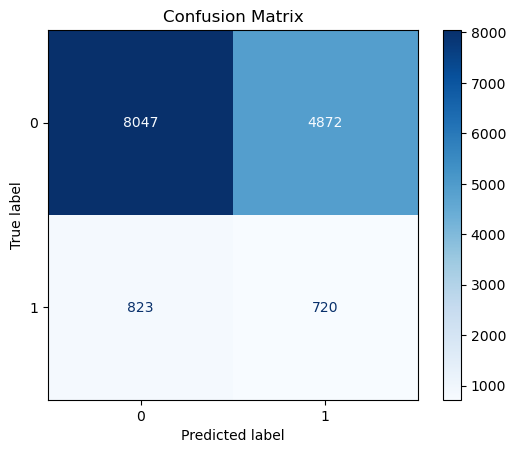

Classification Report:

              precision    recall  f1-score   support

           0     0.9072    0.6229    0.7386     12919
           1     0.1288    0.4666    0.2018      1543

    accuracy                         0.6062     14462
   macro avg     0.5180    0.5448    0.4702     14462
weighted avg     0.8242    0.6062    0.6814     14462

ROC AUC Score: 0.5571


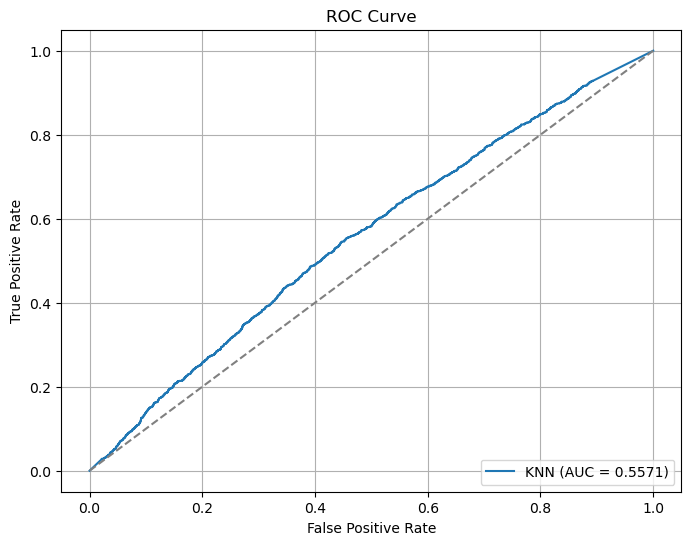

In [50]:
# 1. Predict on the test set
y_pred = final_knn_pipeline.predict(X_test)
y_proba = final_knn_pipeline.predict_proba(X_test)[:, 1]  # For ROC AUC

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 3. Classification Report (includes precision, recall, f1-score)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# 4. ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# 5. ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


After training the final KNN model (with n_neighbors=9, weights='distance', p=1), we evaluated it on the test set.

- The model performs well in identifying the majority class (non-defaulters), but struggles with the minority class (defaulters).

- Recall for class 1 (defaulters) is relatively high (0.4666), meaning it catches ~47% of actual defaulters.

- Precision for class 1 is low (0.1288), suggesting many false positives.

- The ROC AUC score of 0.5571 indicates weak overall separability between the two classes.

- Since this is a credit default prediction task, improving recall and precision for class 1 is crucial. Future iterations may require:

    - More advanced models

    - Better feature engineering

    - Further hyperparameter tuning

    - Threshold adjustment



# Chapter IX Model Saving

After evaluating model performance on the test set, we chose the K-Nearest Neighbors (KNN) model as the final model. 

In [ ]:
# Save the final model pipeline
with open('deployment/final_knn_model.pkl', 'wb') as file:
    pickle.dump(final_knn_pipeline, file)


# Chapter X Inference Model 

Refer to `P1M2_Billy_Saputra_inf.ipynb`

# Chapter XI Conclusion

The objective of this project was to build a predictive model that can identify potential loan defaults based on customer demographic and financial characteristics. By focusing on applicants aged 25–35 years and applying appropriate preprocessing, feature engineering, and resampling strategies, we aimed to create a robust model that balances performance and efficiency.

Through systematic experimentation with several classification algorithms KNN, SVM, Decision Tree, Random Forest, and XGBoost—combined with cross-validation on key evaluation metrics (F1-Score, ROC AUC, Recall), we found that K-Nearest Neighbors (KNN) with optimized hyperparameters (n_neighbors=9, weights='distance', p=1) delivered the best trade-off between simplicity and performance within reasonable training time.

Final evaluation on the test set showed:

- Recall: 46.66% (ability to detect actual defaults)

- F1-Score: 20.18% (balance between precision and recall)

- ROC AUC: 55.71% (ability to distinguish between classes)

While recall remains a priority due to the high cost of undetected defaults, the model still struggles with precision—indicating the need for further enhancement, possibly through more granular features or ensemble methods.

In conclusion, the trained KNN model serves as a strong baseline and has been successfully saved and deployed for inference on unseen data. This fulfills the project's objective of creating a working classification pipeline to support financial risk assessment for younger loan applicants.